# 회귀_종합실습1_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [8]:
x_train.shape[1]

18

In [13]:
nfeatures = x_train.shape[1]
model = Sequential(Dense(1, input_shape=(nfeatures,), activation = 'relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [17]:
model.compile(optimizer = Adam(learning_rate=0.01), loss='mse')
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
8/8 [==============================] - 0s 14ms/step - loss: 6.8652 - val_loss: 9.4464
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 6.7060 - val_loss: 9.3527
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 6.5901 - val_loss: 9.2747
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 6.4708 - val_loss: 9.1341
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 6.3552 - val_loss: 9.0281
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 6.2547 - val_loss: 8.9184
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 6.1494 - val_loss: 8.8583
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - loss: 6.0616 - val_loss: 8.7943
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 5.9722 - val_loss: 8.7335
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 5.8892 - val_loss: 8.6649
Epoch 11/50
8/8 [===================

* 학습곡선

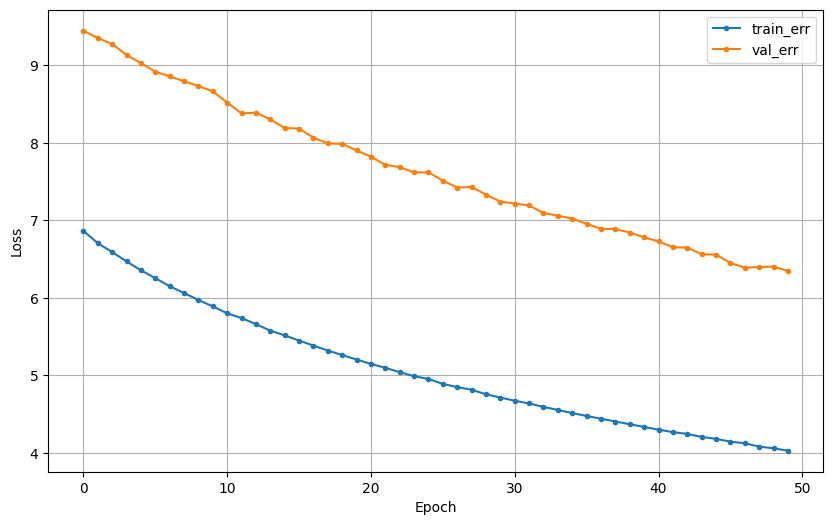

In [18]:
dl_history_plot(hist)

* 검증

In [19]:
pred = model.predict(x_val)
print('MAE', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 2ms/step
MAE 2.008652618050575


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [20]:
model = Sequential([Dense(4, input_shape = (nfeatures,), activation = 'relu'), Dense(1, input_shape = (4,))])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 76        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [21]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss='mse')
hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 50).history

Epoch 1/50
8/8 [==============================] - 0s 14ms/step - loss: 53.4668 - val_loss: 44.5393
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 42.2792 - val_loss: 33.2292
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 29.2765 - val_loss: 21.7453
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 17.5472 - val_loss: 12.9202
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 9.6678 - val_loss: 9.4313
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 7.2466 - val_loss: 9.9843
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 7.3161 - val_loss: 10.1743
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 7.0577 - val_loss: 9.4440
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 6.5534 - val_loss: 8.7641
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 6.3836 - val_loss: 8.4466
Epoch 11/50
8/8 [============

* 학습곡선

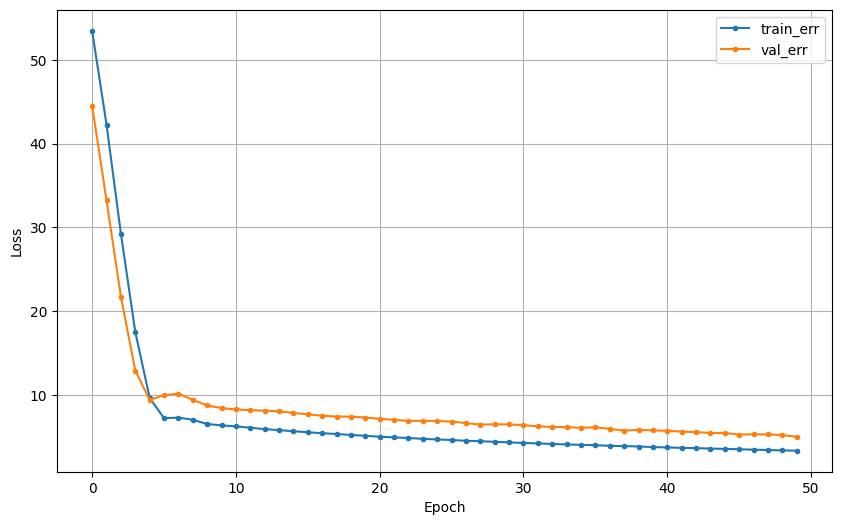

In [22]:
dl_history_plot(hist)

* 검증

In [23]:
pred = model.predict(x_val)
print('MAE', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 2ms/step
MAE 1.7864421296119688


### (3) 모델3

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [28]:
clear_session()
model = Sequential([Dense(8, input_shape=(nfeatures,), activation='relu'), Dense(8, input_shape=(8,), activation='relu'),
                    Dense(4, input_shape=(8,), activation='relu'),Dense(1, input_shape=(4,))])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 152       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 265 (1.04 KB)
Trainable params: 265 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [29]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'mse')
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2).history

Epoch 1/50
8/8 [==============================] - 1s 17ms/step - loss: 64.6785 - val_loss: 58.0493
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 59.2124 - val_loss: 51.6940
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 50.1946 - val_loss: 40.1210
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 35.2208 - val_loss: 22.9128
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 15.5450 - val_loss: 9.3775
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 9.1830 - val_loss: 13.4945
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 8.3419 - val_loss: 9.1484
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 6.9086 - val_loss: 8.6961
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 6.8905 - val_loss: 8.5853
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 6.3445 - val_loss: 8.6495
Epoch 11/50
8/8 [===========

* 학습곡선

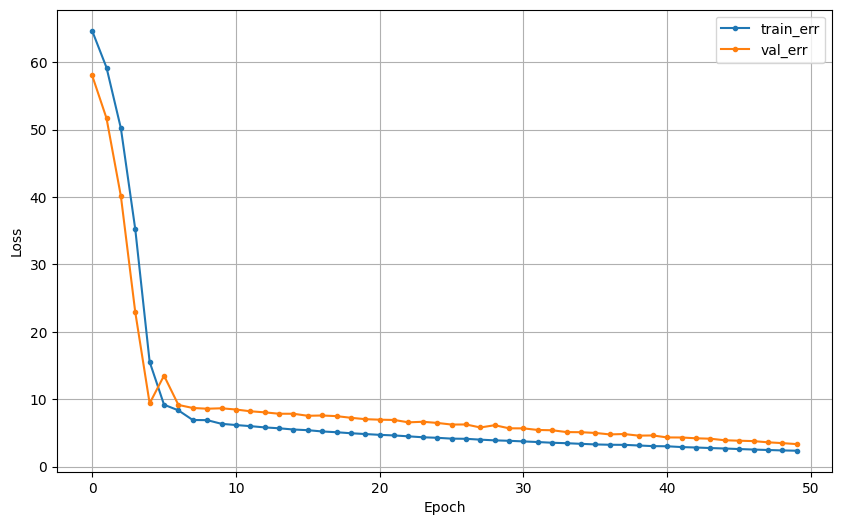

In [30]:
dl_history_plot(hist)

* 검증

In [31]:
pred = model.predict(x_val)
print('MAE', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 2ms/step
MAE 1.469745612859726
